In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import ttest_ind
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Helvetica'

In [3]:
#https://www.pnas.org/doi/suppl/10.1073/pnas.2302534120#supplementary-materials
#https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE202177
GSE202177 = pd.read_csv("GSE202177_normalized_gene_counts.csv")
GSE_T = GSE202177.T
GSE_T.columns = GSE_T.iloc[0]
GSE_T = GSE_T.drop(GSE_T.index[0])
GSE_T.reset_index(inplace=True)
GSE_T = GSE_T.rename(columns={'index': 'Sample ID'})
phenotype = pd.read_csv("phenotype.csv")
phenotype['size_mosaicism'] = phenotype['CGG'].apply(lambda x: False if str(x).strip() == '>200' else True)
phenotype_methylation = phenotype[~phenotype['MPCR Methylation'].isin(['P', '-'])]
phenotype_methylation['methylation_mosaicism'] = phenotype['MPCR Methylation'].apply(lambda x: False if str(x).strip() in ['100% FM', '>200 100% FM'] else True)
phenotype_methylation['mosaicism'] = phenotype_methylation['methylation_mosaicism'] + phenotype_methylation['size_mosaicism']
phenotype['size_mosaicism'] = phenotype['CGG'].apply(lambda x: 'No' if str(x).strip() == '>200' else 'Yes')
phenotype_methylation['methylation_mosaicism'] = phenotype['MPCR Methylation'].apply(lambda x: 'No' if str(x).strip() in ['100% FM', '>200 100% FM'] else 'Yes')
phenotype_genex = pd.merge(phenotype, GSE_T, on='Sample ID')
phenotype_genex['SLITRK4'] = pd.to_numeric(phenotype_genex['SLITRK4'], errors='coerce')
phenotype_genex['KHDRBS2'] = pd.to_numeric(phenotype_genex['KHDRBS2'], errors='coerce')
phenotype_genex['ANGEL2'] = pd.to_numeric(phenotype_genex['ANGEL2'], errors='coerce')
phenotype_methylation_genex = pd.merge(phenotype_methylation, GSE_T, on='Sample ID')
phenotype_methylation_genex['SLITRK4'] = pd.to_numeric(phenotype_methylation_genex['SLITRK4'], errors='coerce')
phenotype_methylation_genex['KHDRBS2'] = pd.to_numeric(phenotype_methylation_genex['KHDRBS2'], errors='coerce')
phenotype_methylation_genex['ANGEL2'] = pd.to_numeric(phenotype_methylation_genex['ANGEL2'], errors='coerce')

/var/folders/v1/3py01kc1619d4sj6bsmhx3br0000gn/T/ipykernel_57195/2855764205.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenotype_methylation['methylation_mosaicism'] = phenotype['MPCR Methylation'].apply(lambda x: False if str(x).strip() in ['100% FM', '>200 100% FM'] else True)
/var/folders/v1/3py01kc1619d4sj6bsmhx3br0000gn/T/ipykernel_57195/2855764205.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenotype_methylation['mosaicism'] = phenotype_methylation['methylation_mosaicism'] + phenoty

p-value: 0.0001


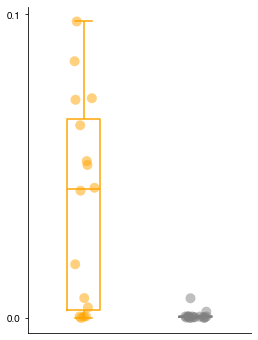

In [4]:
plt.figure(figsize=(4, 6))
s = sns.stripplot(data=phenotype_genex, x='size_mosaicism', y='PMBC [ng FMRP/ ug total protein]', 
              jitter=0.1,
            hue='size_mosaicism', size=10, alpha=0.5, palette={"Yes": "orange", "No": "grey"})
sns.boxplot(data=phenotype_genex, x='size_mosaicism', y='PMBC [ng FMRP/ ug total protein]', 
            hue='size_mosaicism', width=0.3,
            fill=False,
            showfliers=False, palette={"Yes": "orange", "No": "grey"})
group1 = phenotype_genex[phenotype_genex['size_mosaicism'] == 'Yes']['PMBC [ng FMRP/ ug total protein]'].dropna()
group2 = phenotype_genex[phenotype_genex['size_mosaicism'] == 'No']['PMBC [ng FMRP/ ug total protein]'].dropna()
t_stat, p_value = ttest_ind(group1, group2)
s.set(title='')
s.set(xlabel=None) 
s.set(ylabel=None)
s.set_xticks([])
s.spines['top'].set_visible(False)
s.spines['right'].set_visible(False)
s.set_yticks([0, .1])
#plt.text(0.5, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
print(f'p-value: {p_value:.4f}')
#plt.savefig('size_mosaicism_FMRP.pdf',dpi=1000)

p-value: 0.0024


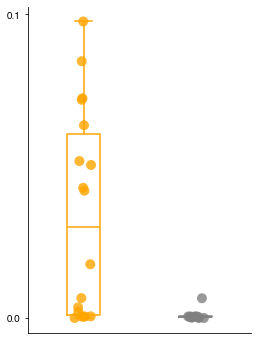

In [5]:
plt.figure(figsize=(4, 6))
s = sns.stripplot(data=phenotype_methylation_genex, x='methylation_mosaicism', y='PMBC [ng FMRP/ ug total protein]', 
              jitter=0.1, 
            hue='methylation_mosaicism', size=10, alpha=0.8, palette={"Yes": "orange", "No": "grey"})
sns.boxplot(data=phenotype_methylation_genex, x='methylation_mosaicism', y='PMBC [ng FMRP/ ug total protein]', 
            hue='methylation_mosaicism',width=0.3,
            fill=False,
           showfliers=False, palette={"Yes": "orange", "No": "grey"})
group1 = phenotype_methylation_genex[phenotype_methylation_genex['methylation_mosaicism'] == 'Yes']['PMBC [ng FMRP/ ug total protein]'].dropna()
group2 = phenotype_methylation_genex[phenotype_methylation_genex['methylation_mosaicism'] == 'No']['PMBC [ng FMRP/ ug total protein]'].dropna()
t_stat, p_value = ttest_ind(group1, group2)
s.set(title='')
s.set(xlabel=None) 
s.set(ylabel=None)
s.set_xticks([])
s.spines['top'].set_visible(False)
s.spines['right'].set_visible(False)
s.set_yticks([0, .1])
s.legend([],[], frameon=False)
#plt.text(0.5, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
print(f'p-value: {p_value:.4f}')
#plt.savefig('methyl_mosaicism_FMRP.pdf',dpi=1000)

p-value: 0.3328


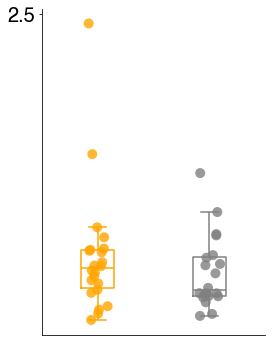

In [6]:
plt.rcParams['font.size']=20
plt.figure(figsize=(4, 6))
s = sns.stripplot(data=phenotype_genex, x='size_mosaicism', y='SLITRK4', 
              jitter=0.1,
            hue='size_mosaicism', size=10, alpha=0.8, palette={"Yes": "orange", "No": "grey"})
sns.boxplot(data=phenotype_genex, x='size_mosaicism', y='SLITRK4', 
            hue='size_mosaicism', width=0.3,
            fill=False,
           showfliers=False, palette={"Yes": "orange", "No": "grey"})
group1 = phenotype_genex[phenotype_genex['size_mosaicism'] == 'Yes']['SLITRK4'].dropna()
group2 = phenotype_genex[phenotype_genex['size_mosaicism'] == 'No']['SLITRK4'].dropna()
t_stat, p_value = ttest_ind(group1, group2)
s.set(title='')
s.set(xlabel=None) 
s.set(ylabel=None)
s.set_xticks([])
s.spines['top'].set_visible(False)
s.spines['right'].set_visible(False)
s.set_yticks([2.5])
#s.set_yticks([0, 0.06])
#plt.text(0.8, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
print(f'p-value: {p_value:.4f}')
#plt.savefig('size_mosaicism_SLITRK4.pdf',dpi=1000)

p-value: 0.6496


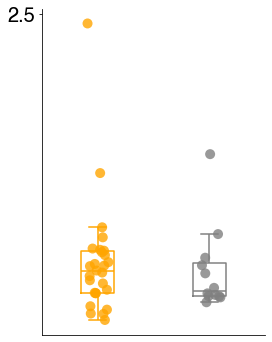

In [7]:
plt.figure(figsize=(4, 6))
s = sns.stripplot(data=phenotype_methylation_genex, x='methylation_mosaicism', y='SLITRK4', 
              jitter=0.1, 
            hue='methylation_mosaicism', size=10, alpha=0.8, palette={"Yes": "orange", "No": "grey"})
sns.boxplot(data=phenotype_methylation_genex, x='methylation_mosaicism', y='SLITRK4', 
            hue='methylation_mosaicism', width=0.3,
            fill=False,
           showfliers=False, palette={"Yes": "orange", "No": "grey"})
group1 = phenotype_methylation_genex[phenotype_methylation_genex['methylation_mosaicism'] == 'Yes']['SLITRK4'].dropna()
group2 = phenotype_methylation_genex[phenotype_methylation_genex['methylation_mosaicism'] == 'No']['SLITRK4'].dropna()
t_stat, p_value = ttest_ind(group1, group2)
s.set(title='')
s.set(xlabel=None) 
s.set(ylabel=None)
s.set_xticks([])
s.spines['top'].set_visible(False)
s.spines['right'].set_visible(False)
s.set_yticks([2.5])
s.legend([],[], frameon=False)
#plt.text(0.5, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
print(f'p-value: {p_value:.4f}')
#plt.savefig('methyl_mosaicism_SLITRK4.pdf',dpi=1000)

p-value: 0.4623


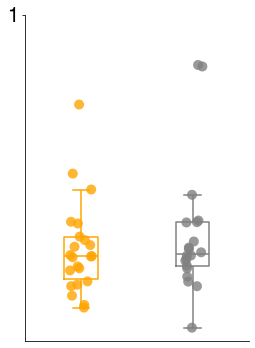

In [8]:
plt.figure(figsize=(4, 6))
s = sns.stripplot(data=phenotype_genex, x='size_mosaicism', y='KHDRBS2', 
              jitter=0.1,
            hue='size_mosaicism', size=10, alpha=0.8, palette={"Yes": "orange", "No": "grey"})
sns.boxplot(data=phenotype_genex, x='size_mosaicism', y='KHDRBS2', 
            hue='size_mosaicism', width=0.3,
            fill=False,
           showfliers=False, palette={"Yes": "orange", "No": "grey"})
group1 = phenotype_genex[phenotype_genex['size_mosaicism'] == 'Yes']['KHDRBS2'].dropna()
group2 = phenotype_genex[phenotype_genex['size_mosaicism'] == 'No']['KHDRBS2'].dropna()
t_stat, p_value = ttest_ind(group1, group2)
s.set(title='')
s.set(xlabel=None) 
s.set(ylabel=None)
s.set_xticks([])
s.spines['top'].set_visible(False)
s.spines['right'].set_visible(False)
s.set_yticks([1])
#plt.text(0.5, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
print(f'p-value: {p_value:.4f}')
#plt.savefig('size_mosaicism_KHDRBS2.pdf',dpi=1000)

p-value: 0.7565


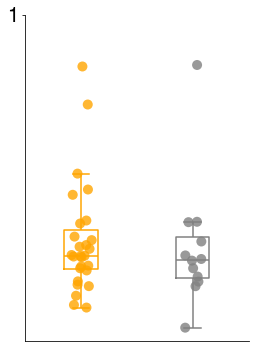

In [9]:
plt.figure(figsize=(4, 6))
s = sns.stripplot(data=phenotype_methylation_genex, x='methylation_mosaicism', y='KHDRBS2', 
              jitter=0.1, 
            hue='methylation_mosaicism', size=10, alpha=0.8, palette={"Yes": "orange", "No": "grey"})
sns.boxplot(data=phenotype_methylation_genex, x='methylation_mosaicism', y='KHDRBS2', 
            hue='methylation_mosaicism', width=0.3,
            fill=False,
           showfliers=False, palette={"Yes": "orange", "No": "grey"})
group1 = phenotype_methylation_genex[phenotype_methylation_genex['methylation_mosaicism'] == 'Yes']['KHDRBS2'].dropna()
group2 = phenotype_methylation_genex[phenotype_methylation_genex['methylation_mosaicism'] == 'No']['KHDRBS2'].dropna()
t_stat, p_value = ttest_ind(group1, group2)
s.set(title='')
s.set(xlabel=None) 
s.set(ylabel=None)
s.set_xticks([])
s.spines['top'].set_visible(False)
s.spines['right'].set_visible(False)
s.set_yticks([1])
s.legend([],[], frameon=False)
#plt.text(0.5, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
print(f'p-value: {p_value:.4f}')
#plt.savefig('methyl_mosaicism_KHDRBS2.pdf',dpi=1000)

p-value: 0.9820


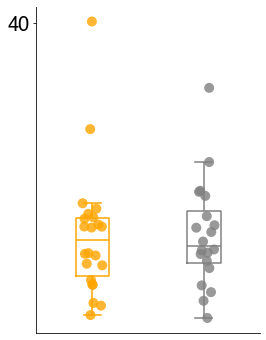

In [10]:
plt.figure(figsize=(4, 6))
s = sns.stripplot(data=phenotype_genex, x='size_mosaicism', y='ANGEL2', 
              jitter=0.1,
            hue='size_mosaicism', size=10, alpha=0.8, palette={"Yes": "orange", "No": "grey"})
sns.boxplot(data=phenotype_genex, x='size_mosaicism', y='ANGEL2', 
            hue='size_mosaicism', width=0.3,
            fill=False,
           showfliers=False, palette={"Yes": "orange", "No": "grey"})
group1 = phenotype_genex[phenotype_genex['size_mosaicism'] == 'Yes']['ANGEL2'].dropna()
group2 = phenotype_genex[phenotype_genex['size_mosaicism'] == 'No']['ANGEL2'].dropna()
t_stat, p_value = ttest_ind(group1, group2)
s.set(title='')
s.set(xlabel=None) 
s.set(ylabel=None)
s.set_xticks([])
s.spines['top'].set_visible(False)
s.spines['right'].set_visible(False)
s.set_yticks([40])
#plt.text(0.5, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
print(f'p-value: {p_value:.4f}')
#plt.savefig('size_mosaicism_ANGEL2.pdf',dpi=1000)

p-value: 0.3630


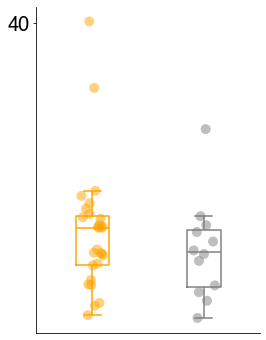

In [11]:
plt.figure(figsize=(4, 6))
s = sns.stripplot(data=phenotype_methylation_genex, x='methylation_mosaicism', y='ANGEL2', 
              jitter=0.1, 
            hue='methylation_mosaicism', size=10, alpha=0.5, palette={"Yes": "orange", "No": "grey"})
sns.boxplot(data=phenotype_methylation_genex, x='methylation_mosaicism', y='ANGEL2', 
            hue='methylation_mosaicism', width=0.3,
            fill=False,
           showfliers=False, palette={"Yes": "orange", "No": "grey"})
group1 = phenotype_methylation_genex[phenotype_methylation_genex['methylation_mosaicism'] == 'Yes']['ANGEL2'].dropna()
group2 = phenotype_methylation_genex[phenotype_methylation_genex['methylation_mosaicism'] == 'No']['ANGEL2'].dropna()
t_stat, p_value = ttest_ind(group1, group2)
s.set(title='')
s.set(xlabel=None) 
s.set(ylabel=None)
s.set_xticks([])
s.spines['top'].set_visible(False)
s.spines['right'].set_visible(False)
s.set_yticks([40])
s.legend([],[], frameon=False)
#plt.text(0.8, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
print(f'p-value: {p_value:.4f}')
#plt.savefig('methyl_mosaicism_ANGEL2.pdf',dpi=1000)